# Landcover Classification

* **Products used:** 
[io_lulc](https://explorer.digitalearth.africa/products/io_lulc), [esa_worldcover](https://explorer.digitalearth.africa/products/esa_worldcover)

## Background

**L**and **U**se/**L**and **C**over (LULC) maps classify land into broad categories such as water, crops, or built area. They are useful for visualising the dominant land uses in a given area. The total area or proportion of different classes can also be calculated for a specified area.

Many organisations publish LULC maps. Both the [The Environmental Systems Research Institute (Esri)](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac), [European Space Agency (ESA)](https://esa-worldcover.org/en), and [Copernicus Global Land Service, Land Use/Land Cover at 100 m](https://land.copernicus.eu/global/content/annual-100m-global-land-cover-maps-available) (CGLS) products are available on the Digital Earth Africa platform. The ESRI and ESA products are derived from ESA Sentinel imagery and available at 10 m resolution for the year of 2020 over the entire African continent, while the CGLS product is available at 100 m resolution, but is updated annually and is currently available from 2015 to 2019.

The accuracy of landcover maps changes with  location and class, so its important to understand the quality of the maps. ESRI publishes information on the accuracy of the LULC product, which is neatly summarised in the confusion matrix located [here](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac). The overall accuracy for all classes is 85 %. Keep in mind that the accuracy statistics in the link are for the globe and not specific to Africa.

ESA's WorldCover product comes with an in-depth report on the quality of the product, which we will not reproduce here. However, the full product validation report can be found using the following link: https://esa-worldcover.org/en/data-access. The overall accuracy for Africa is 73.6%.

The Copernicus Global Land Cover 100m product has a [scientific publication](https://www.sciencedirect.com/science/article/pii/S0034425721004065?via%3Dihub) exploring the accuracy of the annual landcover maps. The overall accuracy for Africa is ~80 %

**Important details:**

* Datacube product name: `io_lulc`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `10`.
        * `0`: `no data`
        * `1`: `water`
        * `2`: `trees`
        * `3`: `grass`
        * `4`: `flooded vegetation`
        * `5`: `crops`
        * `6`: `scrub/shrub`
        * `7`: `built area`
        * `8`: `bare ground`
        * `9`: `snow/ice`
        * `10`: `clouds` - this category indicates that no land cover information is available due to persistent cloud cover.
    * Date-range: 2020
    * Spatial resolution: 10m 


* Datacube product name: `esa_worldcover`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `100`.
        * `0`: `no data`
        * `10`: `tree cover`
        * `20`: `shrubland`
        * `30`: `grassland`
        * `40`: `cropland`
        * `50`: `built up`
        * `60`: `bare/sparse vegetation`
        * `70`: `snow and ice`
        * `80`: `permanent water bodies`
        * `90`: `herbaceous wetland`
        * `95`: `mangroves`
        * `100`: `moss and lichen`
    * Date-range: 2020
    * Spatial resolution: 10m 



* Datacube product name: `cgls_landcover`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `200`.
        * `0`: `no data`
        * `20`: `shrubs`
        * `30`: `herbaceous vegetation`
        * `40`: `cultivated and managed vegetation or agriculture`
        * `50`: `urban or built up`
        * `60`: `bare or sparse vegetation`
        * `70`: `snow and ice`
        * `80`: `permanent water bodies`
        * `90`: `herbaceous wetland`
        * `100`: `moss and lichen`
        * `111`: `closed forest, evergreen needle leaf`
        * `112`: `closed forest, evergreen broad leaf`
        * `113`: `closed forest, deciduous needle leaf`
        * `114`: `closed forest, deciduous broad leaf`
        * `115`: `closed forest, mixed`
        * `116`: `closed forest, unknown`
        * `121`: `open forest, evergreen needle leaf`
        * `122`: `open forest, evergreen broad leaf`
        * `123`: `open forest, deciduous needle leaf`
        * `124`: `open forest, deciduous broad leaf`
        * `125`: `open forest, mixed`
        * `126`: `open forest, unknown`
        * `200`: `open sea`
    * Date-range: 2015-2019
    * Spatial resolution: 100m   

## Description

In this notebook we will load LULC data using `dc.load()` to return a map of land use and land cover classes for a specified area.

Topics covered include:
1. Inspecting the LULC product available in the datacube
2. Using the `dc.load()` function to load in LULC data
3. Plotting LULC using the `plot_lulc()` function
4. An example analysis of the area of LULC classes in a given area
5. Loading and plotting the 'cover fractions' in CGLS

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline

import datacube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from deafrica_tools.plotting import display_map, plot_lulc

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Landcover_Classification")

### List measurements

We can inspect the data available for LULC using datacube's `list_measurements` functionality. The table below lists the products and measurements available for the two LULC datasets indexed within DE Africa's datacube. We can see that the product contains one layer named 'classification'. The datatype is integer, which corresponds to a LULC class.

In [3]:
product_name = ['io_lulc', 'esa_worldcover', 'cgls_landcover'] 

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

name  \
product        measurement                                                    
io_lulc        data                                                    data   
esa_worldcover classification                                classification   
cgls_landcover classification                                classification   
               forest_type                                      forest_type   
               classification_probability        classification_probability   
               bare_cover_fraction                      bare_cover_fraction   
               builtup_cover_fraction                builtup_cover_fraction   
               crops_cover_fraction                    crops_cover_fraction   
               grass_cover_fraction                    grass_cover_fraction   
               mosslichen_cover_fraction          mosslichen_cover_fraction   
               permanentwater_cover_fraction  permanentwater_cover_fraction   
               seasonalwater_cover_fraction    seasonalwater_cover_fraction   
               shrub_cover_fraction                    shrub_cover_fraction   
               snow_cover_fraction                      snow_cover_fraction   
               tree_cover_fraction                      tree_cover_fraction   

                                              dtype    units  nodata  \
product        measurement                                             
io_lulc        data                           uint8        1     0.0   
esa_worldcover classification                 uint8        1     0.0   
cgls_landcover classification                 uint8        1   255.0   
               forest_type                    uint8  percent   255.0   
               classification_probability     uint8  percent   255.0   
               bare_cover_fraction            uint8  percent   255.0   
               builtup_cover_fraction         uint8  percent   255.0   
               crops_cover_fraction           uint8  percent   255.0   
               grass_cover_fraction           uint8  percent   255.0   
               mosslichen_cover_fraction      uint8  percent   255.0   
               permanentwater_cover_fraction  uint8  percent   255.0   
               seasonalwater_cover_fraction   uint8  percent   255.0   
               shrub_cover_fraction           uint8  percent   255.0   
               snow_cover_fraction            uint8  percent   255.0   
               tree_cover_fraction            uint8  percent   255.0   

                                                       aliases  
product        measurement                                      
io_lulc        data                           [classification]  
esa_worldcover classification                              NaN  
cgls_landcover classification                          [class]  
               forest_type                                  []  
               classification_probability               [prob]  
               bare_cover_fraction                      [bare]  
               builtup_cover_fraction                [builtup]  
               crops_cover_fraction                    [crops]  
               grass_cover_fraction                    [grass]  
               mosslichen_cover_fraction          [mosslichen]  
               permanentwater_cover_fraction  [permanentwater]  
               seasonalwater_cover_fraction    [seasonalwater]  
               shrub_cover_fraction                    [shrub]  
               snow_cover_fraction                      [snow]  
               tree_cover_fraction                      [tree]

### Analysis parameters

This section defines the analysis parameters, including:

* `lat, lon, buffer`: center lat/lon and analysis window size for the area of interest
* `resolution`: the pixel resolution to use for loading the LULC dataset. The native resolution of the product is 10 metres i.e. `(-10,10)`
* `measurements`: the 'band' or measurement to load from the product, we can use the native measurement names of one of the aliases

The default location is Madagascar

In [4]:
lat, lon = -19.4557, 46.4644

buffer = 5.0

resolution=(-500, 500) #resample so we can view a large area

measurements='classification'

#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

## Load the LULC datasets

First, we'll load the ESRI Landcover Classification

In [5]:
#create reusable datacube query object
query = {
    'time': ('2020'),
    'x': lons,
    'y': lats,
    'resolution':resolution,
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the data
ds_esri = dc.load(product='io_lulc', **query).squeeze()

print(ds_esri)

/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


<xarray.Dataset>
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 2020-07-02
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


Now we can load the `esa_worldcover` and `cgls_landcover` products over the same region

In [6]:
ds_esa = dc.load(product='esa_worldcover', **query).squeeze()

print(ds_esa)

<xarray.Dataset>
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 2020-07-01T12:00:00
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


In [7]:
ds_cgls = dc.load(product='cgls_landcover', time='2019', measurements=measurements, like=ds_esri.geobox).squeeze()

print(ds_cgls)

<xarray.Dataset>
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 2019-07-02T11:59:59.500000
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 200 200 200 200 200 200 ... 200 200 200 200 200
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


## Plotting data

We can plot LULC for Madagascar and add a legend which corresponds to the classes using the DE Africa wrapper function `plot_lulc`. We can see that trees dominate the eastern areas of the island, while scrub/shrub is more prevalent on the western side. We can also identify a few cities/towns with the red 'built area' class.  You may also notice that the different datasets don't always agree.

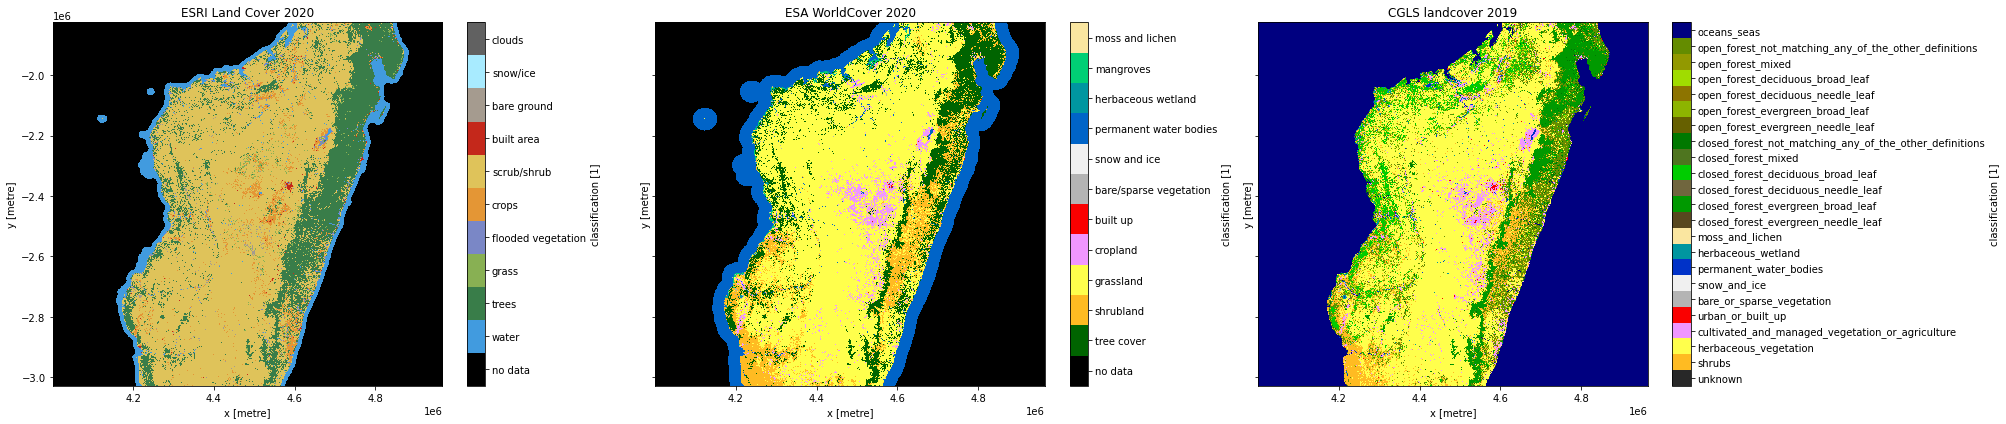

In [8]:
fig,ax = plt.subplots(1,3, figsize=(28,6), sharey=True)
plot_lulc(ds_esri[measurements], product='ESRI', legend=True, ax=ax[0])
plot_lulc(ds_esa[measurements], product='ESA', legend=True, ax=ax[1])
plot_lulc(ds_cgls[measurements], product='CGLS', legend=True, ax=ax[2])
ax[0].set_title('ESRI Land Cover 2020')
ax[1].set_title('ESA WorldCover 2020')
ax[2].set_title('CGLS landcover 2019')
plt.tight_layout();

## Example Analysis: Investigate the area of classes

In this example, we will look more closely at the city of Antananarivo, the capital of Madagascar, which can be seen in red in the map above.  We will load both LULC datasets, calculate the area of each class in each product, and compare the area of classes between the products.  As we are looking at a smaller area, we can load the datasets at 100m resolution (its good practice to down-sample higher resoltion datasets to a coarser resolution than vice-versa). We use the 'mode' statistic to down sample the 10m datasets to 100m resolution, this means each pixel will be assigned the most-common class within the 100m metre pixel.

First, let's set up some new parameters

In [9]:
lat, lon =  -18.9028, 47.5203
buffer = 0.1
resolution=(-100,100)
measuremnents='classification'

#add lat,lon,buffer to get bounding box
lon_range = (lon-buffer, lon+buffer)
lat_range =  (lat+buffer, lat-buffer)

### View selected location

In [10]:
display_map(x=lon_range, y=lat_range)

### Load LULC data for Antananarivo

In [11]:
query = {
    "time": ("2020"),
    "x": lon_range,
    "y": lat_range,
    "resolution": resolution,
    "output_crs": "epsg:6933",
    "measurements": measurements,
}

# load the esri product
ds_esri = dc.load(product="io_lulc", resampling='mode', **query).squeeze()

# load the esa product
ds_esa = dc.load(product="esa_worldcover",resampling='mode', **query).squeeze()

# load the cgls product
ds_cgls = dc.load(
    product="cgls_landcover",
    time="2019",
    measurements=measurements,
    like=ds_esri.geobox
).squeeze()

/env/lib/python3.8/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


### Plot the three datasets

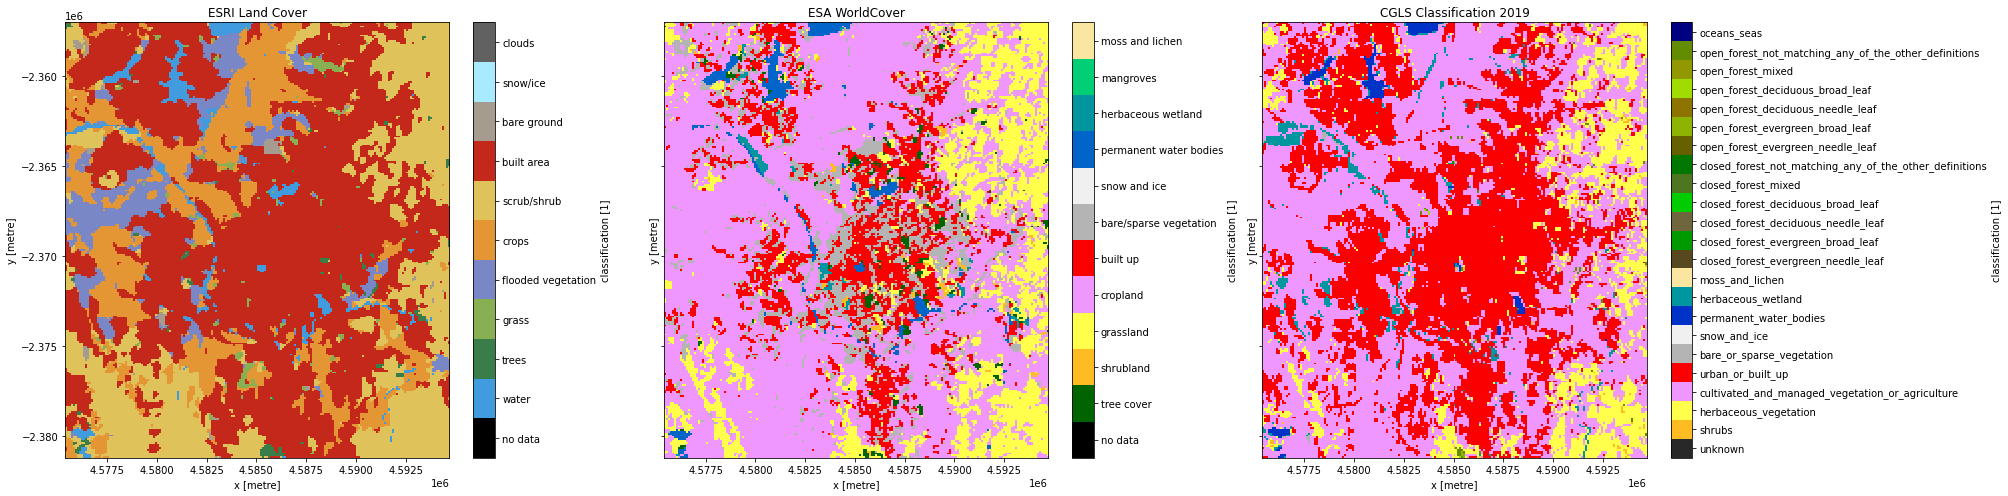

In [12]:
fig,ax = plt.subplots(1,3, figsize=(28,7), sharey=True)
plot_lulc(ds_esri[measurements], product='ESRI', legend=True, ax=ax[0])
plot_lulc(ds_esa[measurements], product='ESA', legend=True, ax=ax[1])
plot_lulc(ds_cgls[measurements], product='CGLS', legend=True, ax=ax[2])
ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover')
ax[2].set_title('CGLS Classification 2019')
plt.tight_layout();

### Calculate the area of each class

We can use the numpy `np.unique` function to return the pixel count for each class.

In [13]:
ds_esri_counts = np.unique(ds_esri[measurements].data, return_counts=True)
ds_esa_counts = np.unique(ds_esa[measurements].data, return_counts=True)
ds_cgls_counts = np.unique(ds_cgls[measurements].data, return_counts=True)

print(ds_esri_counts)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8), array([ 1237,   261,   463,  2851,  7824, 10025, 23817,   228]))


We can see above that result is an array with classes 1:8 which corresponds to `water` through to `bareground`, and the count of pixels within these classes. Using the resolution we set in our data loading query, we can calculate the total area of each class in square kilometres and plot the results. Does the plot align with the proportions of class we can visualise in the map of Antananarivo?

For more information on area calculations see the water extent calculation section of the Digital Earth Africa Sandbox [training course](https://learn.digitalearthafrica.org/courses/course-v1:digitalearthafrica+DEA101+2021/course/).

In [14]:
pixel_length = query["resolution"][1]  # in metres, refers to resolution we defined above (-10,10) for Antananarivo
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2

#calculate the area of each class
ds_esri_area = np.array(ds_esri_counts[1] * area_per_pixel)
ds_esa_area = np.array(ds_esa_counts[1] * area_per_pixel)
ds_cgls_area = np.array(ds_cgls_counts[1] * area_per_pixel)

### Plot the area of each class

In the plot below, are the proportions of classes similar between the products? What are the classes that typically show confusion?

> NOTE: The list of classes below reflects those that are _actually in the map_ - if you change the location of the default map, you may need to change the list of classes below. If your region has a different set of classes than those listed below you'll recieve a `ValueError: shape mismatch: objects cannot be broadcast to a single shape`

In [15]:
#list of classes actually in the map
esri_classes = ['water', 'trees', 'grass', 'flooded veg', 'crops',
                'scrub/shrub', 'built area', 'bare ground']

esa_classes = ['tree cover', 'shrubland', 'grassland', 'cropland', 'built up',
               'bare/sparse veg', 'water bodies', 'wetlands']

cgls_classes = ['shrubs', 'herbaceous vegetation','cultivated and managed vegetation or agriculture', 'urban or built up', 'bare or sparse vegetation', 'permanent water bodies',
                'herbaceous wetland', 'closed forest, evergreen broad leaf', 'open forest, evergreen broad leaf', 'open forest, deciduous broad leaf', 'open forest, unknown']


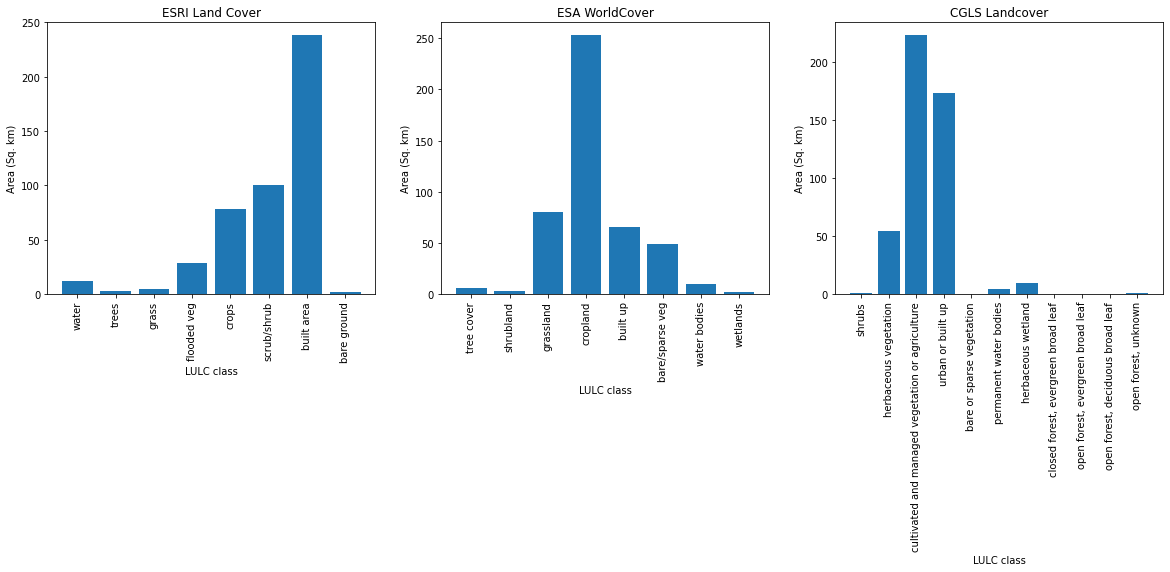

In [16]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

#plot esri
ax[0].bar(esri_classes, ds_esri_area)
ticks_loc = ax[0].get_xticks()
ax[0].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[0].set_xticklabels(esri_classes, rotation=90)
ax[0].set_xlabel("LULC class")
ax[0].set_ylabel("Area (Sq. km)")

#plot worldcover
ax[1].bar(esa_classes, ds_esa_area)
ticks_1 = ax[1].get_xticks()
ax[1].xaxis.set_major_locator(mticker.FixedLocator(ticks_1))
ax[1].set_xticklabels(esa_classes, rotation=90)
ax[1].set_xlabel("LULC class")
ax[1].set_ylabel("Area (Sq. km)")

#plot cgls
ax[2].bar(cgls_classes, ds_cgls_area)
ticks_2 = ax[2].get_xticks()
ax[2].xaxis.set_major_locator(mticker.FixedLocator(ticks_2))
ax[2].set_xticklabels(cgls_classes, rotation=90)
ax[2].set_xlabel("LULC class")
ax[2].set_ylabel("Area (Sq. km)")

ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover')
ax[2].set_title('CGLS Landcover');

## Explore CGLS cover fraction

In the above analysis we can see that the CGLS product classifies a lof of the area in our Antananarivo bounds as 'urban or built up'. Let's see how this relates to the builtup cover fraction measurement in the CGLS product. 

The cover fraction measurements in CGLS express the percentage of the pixel that is covered by a specific class of land cover, in this case urban or built-up. We can see below that the percentage cover of urban or built-up area corresponds spatially to the landcover classification.

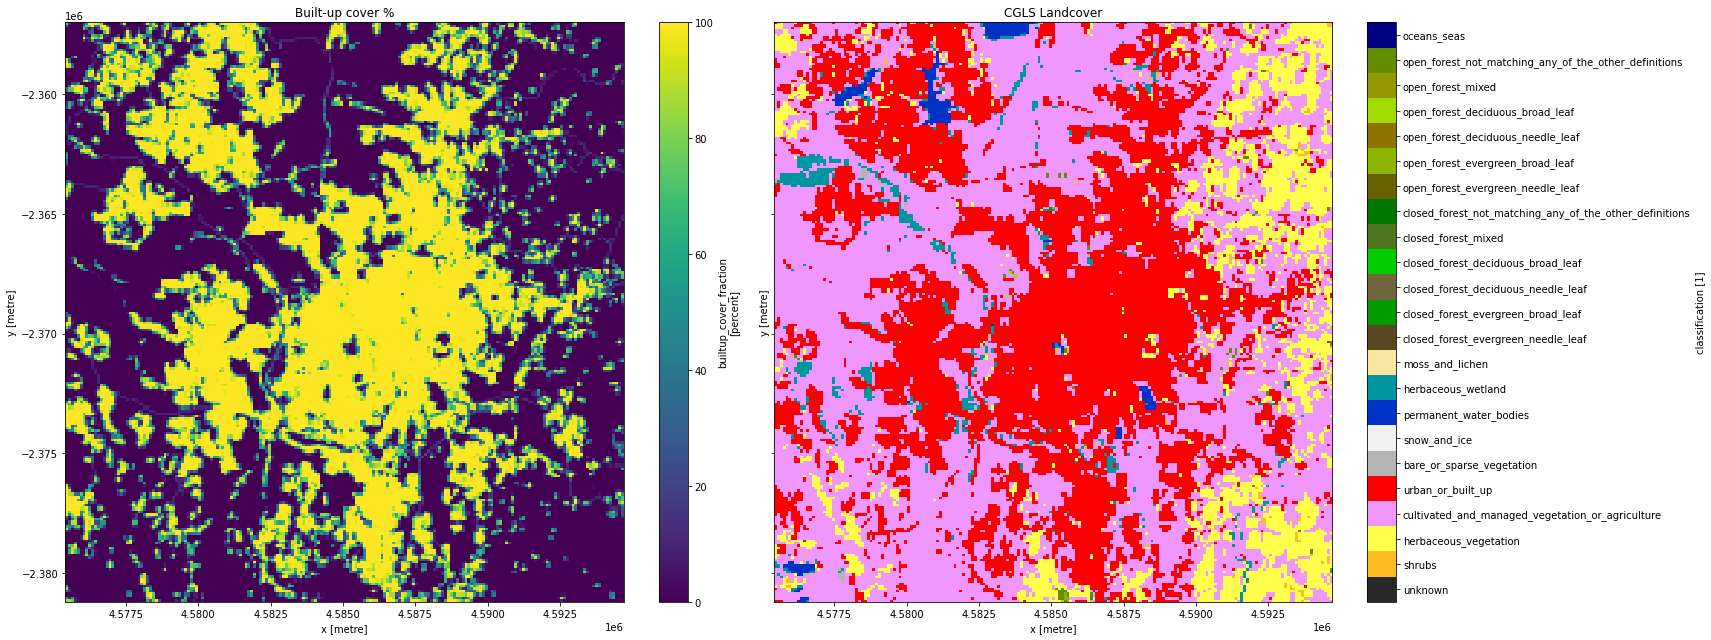

In [17]:
#load the cgls product
ds_cgls_urbancover = dc.load(product='cgls_landcover', time='2019', measurements='builtup_cover_fraction', like=ds_cgls.geobox).squeeze()

#plot the dataset
fig,ax = plt.subplots(1,2, figsize=(24,9), sharey=True)
ds_cgls_urbancover.builtup_cover_fraction.plot(ax=ax[0])
plot_lulc(ds_cgls[measurements], product='CGLS', legend=True, ax=ax[1])

ax[0].set_title('Built-up cover %')
ax[1].set_title('CGLS Landcover')
plt.tight_layout();

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [18]:
print(datacube.__version__)

1.8.6


**Last tested:**

In [19]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2022-01-31'